<a href="https://colab.research.google.com/github/kus3093/Pytorch_Tutorial/blob/main/simple_neuralnetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [189]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [190]:
#what is the difference between functional vs class based object orienting programming?

In [191]:
# Create a Model Class that inherits nn.Module

  # input layer (4 features of the flower) -->
  # Hidden Layer1 (number of neurons) -->
  # H2(nn) -->
  # output (3 classes of flowers)


Need to understand neuron theory.  why would we select different neurons?

In [192]:
class Model(nn.Module):
  def __init__ (self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() # initiate our nn.Module.  I'm confused
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

Next-- we need to create a manual seed.  ChatGPT- I'll need your help understanding the class and function above.  I'm folowing the basics- but don't understand init, self, nn.Linera, relu, what the F import is, etc.


In [193]:
# Pick a manual seed for randominzation
torch.manual_seed(41)
# Create an instance of module
model = Model()

In [194]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [195]:


url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)
my_df ##Will print the data table to confirm

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [196]:
my_df['species'] = my_df['species'].map({
    'setosa': 0,
    'versicolor': 1,
    'virginica': 2
})

my_df



,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [197]:
# Train Test Split Set X, y
X = my_df.drop('species', axis=1)
y = my_df['species']

In [198]:
# Convert these to numpy arrays
X = X.values
y = y.values

In [199]:
from sklearn.model_selection import train_test_split

In [200]:
# x Train Test Split.  Chatgpt i need your help explaining the test size
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=41)

In [201]:
#Convert Xfeatures to float tensors.  I don't understand this
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)


In [202]:
#Convert y labels to tensors long.  why is this different than float tensors above?
#what is a long tensor?  is that an integer?
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [203]:
#Set the criterion of the model to measure the error
#How far off the predictions are from the data
criterion = nn.CrossEntropyLoss() # I don't understand this

#Chose Adam Optimizer, lr = learning rate
#(if error doesnt go  down w/ epochs, want to reduce the learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [204]:
#Train our model
#Epochs?  (one run thru all the training data in our network)
epochs = 100
losses = []
for i in range(epochs):
  #go forward and get a prediction
  y_pred = model.forward(X_train) #get predicted results

  #measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) #predicted value vs. the y train

  #keep track of our losses
  losses.append(loss.detach().numpy())

  #print every 10 epochs
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propagation:  take the error rate of forward propagation
  # feed it back thru the network to fine tune the weights

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.1251550912857056
Epoch: 10 and loss: 1.0096259117126465
Epoch: 20 and loss: 0.8157405853271484
Epoch: 30 and loss: 0.585706353187561
Epoch: 40 and loss: 0.3999636471271515
Epoch: 50 and loss: 0.26768800616264343
Epoch: 60 and loss: 0.17942361533641815
Epoch: 70 and loss: 0.12151690572500229
Epoch: 80 and loss: 0.0860118493437767
Epoch: 90 and loss: 0.06520850956439972


Text(0.5, 0, 'epoch')

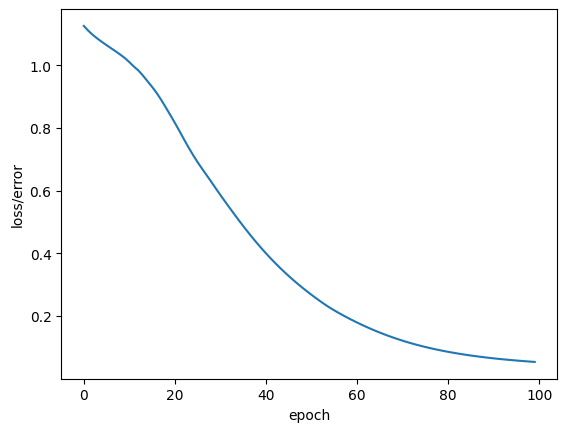

In [205]:
#Graph it out!
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("epoch")
